<a href="https://colab.research.google.com/github/cs449w23/project-cs_get_degrees/blob/main/Pre-process_X-ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libs
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from collections import defaultdict
from torch.utils.data import Dataset, random_split, TensorDataset
from torchvision import datasets, io
from torchvision.transforms import ToTensor, Resize
import matplotlib.image as mpimg
from torch.utils.data import DataLoader
import time
import pandas as pd

In [ ]:
# Load data and discard non-relevant data
data_entry_df = pd.read_csv("/kaggle/input/data/Data_Entry_2017.csv")
data_entry_df = data_entry_df[["Image Index", "Finding Labels"]]
data_entry_df.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion
3,00000002_000.png,No Finding
4,00000003_000.png,Hernia


In [ ]:
# Load list of image filenames
train_images = []
with open("/kaggle/input/data/train_val_list.txt","r") as f:
    train_images = f.readlines()
train_images = list(map(lambda img: img.replace('\n', ""), train_images))
print(len(train_images)/8)

10815.5


In [ ]:
# Create mappping from text to encoding
label_map = {'Atelectasis': 0,
             'Cardiomegaly': 1,
             'Effusion': 2,
             'Infiltration': 3,
             'Mass': 4,
             'Nodule': 5,
             'Pneumonia': 6,
             'Pneumothorax': 7,
             'Consolidation': 8,
             'Edema': 9,
             'Emphysema': 10,
             'Fibrosis': 11,
             'Pleural_Thickening': 12,
             'Hernia': 13
            }
# Convert .png files to tensor representation
img_index = 0
images = torch.zeros(len(train_images)//8,1,256, 256, dtype=torch.uint8)
labels = torch.zeros(len(train_images)//8, 14)
for dir_num in ['001','002','003','004','005','006','007','008','009','010','011','012']:
    try:
        while img_index < len(train_images)/2:
            images[img_index] = Resize(256)(io.read_image('/kaggle/input/data/images_' + dir_num + "/images/" + train_images[img_index], mode=io.ImageReadMode.GRAY))
            image_name = train_images[img_index]
            condition = data_entry_df.loc[data_entry_df['Image Index'] == image_name]['Finding Labels'].values[0]
            conditions = condition.replace("No Finding", "").split('|')
            for condition in conditions:
                if condition != "":
                    labels[img_index][label_map[condition]] = 1
            img_index +=1
            if img_index % 250 == 0:
                print(f"Img_index: {img_index}")
    except Exception as e:
        print("done w/ " + dir_num)
        print(e)
torch.save(images, "/kaggle/working/X-ray_images_small")
torch.save(labels, "/kaggle/working/X-ray_labels_small")

            

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


Img_index: 250
Img_index: 500
Img_index: 750
Img_index: 1000
Img_index: 1250
Img_index: 1500
Img_index: 1750
Img_index: 2000
Img_index: 2250
Img_index: 2500
Img_index: 2750
Img_index: 3000
Img_index: 3250
Img_index: 3500
Img_index: 3750
Img_index: 4000
done w/ 001
[Errno 2] No such file or directory: '/kaggle/input/data/images_001/images/00001336_000.png'
Img_index: 4250
Img_index: 4500
Img_index: 4750
Img_index: 5000
Img_index: 5250
Img_index: 5500
Img_index: 5750
Img_index: 6000
Img_index: 6250
Img_index: 6500
Img_index: 6750
Img_index: 7000
Img_index: 7250
Img_index: 7500
Img_index: 7750
Img_index: 8000
Img_index: 8250
Img_index: 8500
Img_index: 8750


libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


Img_index: 9000
Img_index: 9250
Img_index: 9500
Img_index: 9750
Img_index: 10000
Img_index: 10250
Img_index: 10500
Img_index: 10750
done w/ 002
index 10815 is out of bounds for dimension 0 with size 10815
done w/ 003
[Errno 2] No such file or directory: '/kaggle/input/data/images_003/images/00003423_021.png'
done w/ 004
[Errno 2] No such file or directory: '/kaggle/input/data/images_004/images/00003423_021.png'
done w/ 005
[Errno 2] No such file or directory: '/kaggle/input/data/images_005/images/00003423_021.png'
done w/ 006
[Errno 2] No such file or directory: '/kaggle/input/data/images_006/images/00003423_021.png'
done w/ 007
[Errno 2] No such file or directory: '/kaggle/input/data/images_007/images/00003423_021.png'
done w/ 008
[Errno 2] No such file or directory: '/kaggle/input/data/images_008/images/00003423_021.png'
done w/ 009
[Errno 2] No such file or directory: '/kaggle/input/data/images_009/images/00003423_021.png'
done w/ 010
[Errno 2] No such file or directory: '/kaggle/in

libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


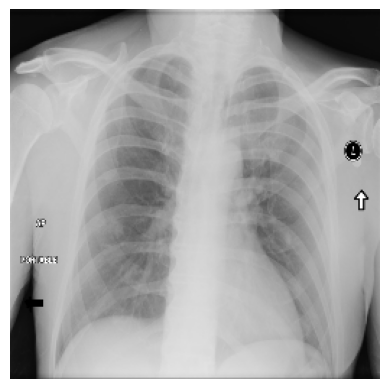

In [ ]:
# Print Image as sanity check
images = Resize(256)(io.read_image('/kaggle/input/data/images_001/images/00000004_000.png'))
labels = {
    1: "Cancer",
    0: "No Cancer"
}
img = images
img = img.permute(1, 2, 0)
plt.axis("off")
plt.imshow(img)#,cmap='gray', vmin=0, vmax=255)
plt.show()